# Задание 2.2: Реализация фильтра "усреднение" и сравнение с методом opencv

In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
from typing import Tuple

## Загрузка изображения

(-0.5, 299.5, 299.5, -0.5)

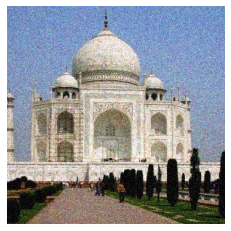

In [2]:
image = cv2.imread("exmpl.jpg")
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.axis('off')

## Фильтр усреднения

In [3]:
def AvgBlur(img: np.ndarray, ksize: Tuple[int, int]):
    list_img = img.tolist()
    new_img = list_img.copy()
    size_x, size_y = ksize
    size_x //= 2
    size_y //= 2
    divider = (2*size_x+1)*(2*size_y+1)
    for i in range(size_x, len(list_img) - size_x):
        for j in range(size_y, len(list_img[i]) - size_y):
            cols = np.array([0, 0, 0])
            for a in range(i-size_x, i+size_x+1):
                for b in range(j-size_y, j+size_y+1):
                    cols += list_img[a][b]
            cols //= divider
            new_img[i][j] = cols
            
    return np.array(new_img)

### Наша функция с параметром (2, 2)

(-0.5, 299.5, 299.5, -0.5)

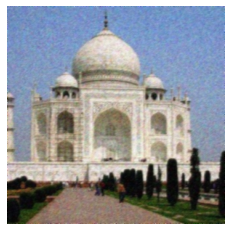

In [4]:
new_img = AvgBlur(image, (2, 2))
plt.imshow(new_img)
plt.axis('off')

### Наша функция с параметром (4, 4)

(-0.5, 299.5, 299.5, -0.5)

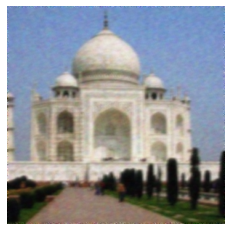

In [5]:
new_img_two = AvgBlur(image, (4, 4))
plt.imshow(new_img_two)
plt.axis('off')

### Встроенная функция blur с параметром (2, 2)

(-0.5, 299.5, 299.5, -0.5)

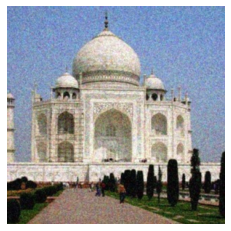

In [6]:
med = cv2.blur(image, (2, 2))
plt.imshow(med)
plt.axis('off')

### Встроенная функция medianBlur с параметром (4, 4)

(-0.5, 299.5, 299.5, -0.5)

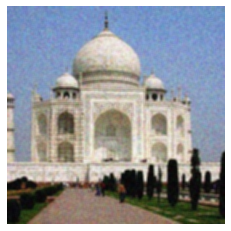

In [7]:
med_two = cv2.blur(image, (4, 4))
plt.imshow(med_two)
plt.axis('off')

## Сравнение нашей функции и встроенной

### Функция измерения времени работы функции

In [11]:
from timeit import default_timer as timer


def measure_time(callable, *args, max_time=5, num_measures=10, percent_skip=20, **kwargs):
    t0 = timer()
    result = callable(*args, **kwargs)
    time = timer() - t0

    if time > max_time:
        return (time, result)

    times = []
    for i in range(num_measures):
        t0 = timer()
        _ = callable(*args, **kwargs)
        times.append(timer() - t0)

    le = int(num_measures*percent_skip/100)
    ri = num_measures - le
    cnt = ri - le + 1
    sum = 0
    while le <= ri:
        sum += times[le]
        le += 1

    return (sum / cnt, result)

### Время работы нашей функции

In [9]:
time, _ = measure_time(AvgBlur, image, (2, 2))
print (time)

3.9961086857142942


### Время работы встроенной функции

In [10]:
time, _ = measure_time(cv2.blur, image, (2, 2))
print (time)

0.00032774285711769025


## Сравнение сходства двух изображений

### Функции сравнения

In [12]:
def immse(fi_image: np.ndarray, se_image: np.ndarray) -> float:
    return ((fi_image - se_image) ** 2).mean()

def psnr(fi_image: np.ndarray, se_image: np.ndarray) -> float:
    mse = immse(fi_image, se_image)
    if mse == 0:
        return 100.0
    return 10 * math.log((255.0 * 255.0 / mse), 10)


### Сходство по psnr

In [13]:
print (psnr(new_img_two, med))

23.90436536951277


In [14]:
print (psnr(new_img, med_two))

29.72863010716133
